Compact DFA transition table:



,From,On input,To
0,q0,lowercase letter,q1
1,q0,other (digit/space/punct/upper),q_dead
2,q1,lowercase letter,q1
3,q1,other (digit/space/punct/upper),q_dead
4,q_dead,any,q_dead


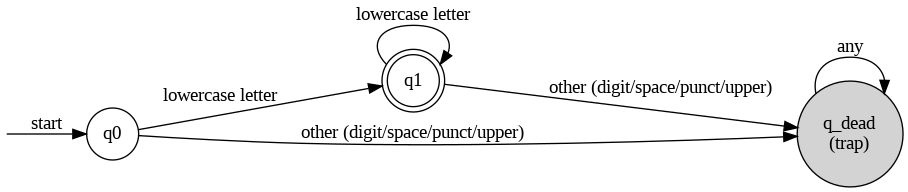


Testing words:
cat: Accepted
dog: Accepted
a: Accepted
zebra: Accepted
dog1: Not Accepted
1dog: Not Accepted
DogHouse: Not Accepted
Dog_house: Not Accepted
 cats: Not Accepted


In [ ]:
import pandas as pd
from graphviz import Digraph
from IPython.display import Image, display

# States
initial_state = "q0"
accept_state = "q1"
dead_state = "q_dead"

# Transition labels
label_lower = "lowercase letter"
label_other = "other (digit/space/punct/upper)"

# Build human-readable compact transition table
rows = [
    {"From": initial_state, "On input": label_lower, "To": accept_state},
    {"From": initial_state, "On input": label_other, "To": dead_state},
    {"From": accept_state, "On input": label_lower, "To": accept_state},
    {"From": accept_state, "On input": label_other, "To": dead_state},
    {"From": dead_state, "On input": "any", "To": dead_state},
]
df_trans = pd.DataFrame(rows)
print("Compact DFA transition table:\n")
display(df_trans)

# Build Graphviz diagram
dot = Digraph("DFA", format="png")
dot.attr(rankdir="LR", fontsize="12")

# Nodes: mark accept state doublecircle, dead state styled
dot.node("", shape="none", width="0")  # invisible start
dot.node(initial_state, shape="circle")
dot.node(accept_state, shape="doublecircle")
dot.node(dead_state, shape="circle", style="filled", fillcolor="lightgrey", label="q_dead\n(trap)")

# Start arrow
dot.edge("", initial_state, label="start")

# Transitions
dot.edge(initial_state, accept_state, label=label_lower)
dot.edge(initial_state, dead_state, label=label_other)

dot.edge(accept_state, accept_state, label=label_lower)
dot.edge(accept_state, dead_state, label=label_other)

dot.edge(dead_state, dead_state, label="any")

# Render & display
filename = "simplified_word_dfa"
dot.render(filename, cleanup=True)
display(Image(filename + ".png"))

# Function to check if a word is accepted by the DFA
def is_accepted(word):
    current_state = initial_state
    for char in word:
        if current_state == initial_state:
            if 'a' <= char <= 'z':
                current_state = accept_state
            else:
                current_state = dead_state
        elif current_state == accept_state:
            if not ('a' <= char <= 'z'):
                current_state = dead_state
        elif current_state == dead_state:
            pass # Stay in dead state
        if current_state == dead_state:
            break # Optimization: if in dead state, stay there

    return current_state == accept_state

# Test cases
test_words = ["cat", "dog", "a", "zebra", "dog1", "1dog", "DogHouse", "Dog_house", " cats"]

print("\nTesting words:")
for word in test_words:
    result = "Accepted" if is_accepted(word) else "Not Accepted"
    print(f"{word}: {result}")

Experiment - actual fst



In [ ]:
import string

class FST:
    def __init__(self):
        self.transitions = {}
        self.start_state = "q0"
        self.final_states = {"q_final"}

    def add_transition(self, state, inp, next_state, out):
        self.transitions[(state, inp)] = (next_state, out)

    def run(self, word: str) -> str:
        state = self.start_state
        output = ""

        # Special plural cases
        if word.endswith("ies"):
            root = word[:-3] + "y"
            return f"{root}+N+PL"
        elif word.endswith("es"):
            root = word[:-2]
            return f"{root}+N+PL"
        elif word.endswith("s") and len(word) > 1:
            root = word[:-1]
            return f"{root}+N+PL"
        else:
            return f"{word}+N+SG"


def process_file(input_file: str = "brown_nouns.txt",
                 output_file: str = "fst_output.txt") -> None:
    fst = FST()

    with open(input_file, "r") as f, open(output_file, "w") as out:
        for line in f:
            word = line.strip().lower()
            if not word:
                continue
            analysis = fst.run(word)
            out.write(f"{word} = {analysis}\n")

    print(f"✅ Processed words from {input_file} → Results saved in {output_file}")


# 🔹 Run it
process_file("brown_nouns.txt", "fst_output.txt")

# 🔹 Show first few lines of output
with open("fst_output.txt") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 10:  # show first 10 results
            break


✅ Processed words from brown_nouns.txt → Results saved in fst_output.txt
investigation = investigation+N+SG
primary = primary+N+SG
election = election+N+SG
evidence = evidence+N+SG
irregularities = irregularity+N+PL
place = place+N+SG
jury = jury+N+SG
presentments = presentment+N+PL
charge = charge+N+SG
election = election+N+SG
praise = praise+N+SG
